Machine Learning Final Project

-- Pre Processing Data

In [65]:
#!pip install pandas scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression
from sklearn.metrics import accuracy_score  # or mean_squared_error for regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [66]:
df = pd.read_csv('/Users/karukavina/Documents/VSCODEFiles/ML/ML-Final-Project/student-mat.csv', sep=';')
print(df.head())
# had to seperate by ; instead of the default , bc that is standard practice is european countries

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [67]:
# Data Cleaning and preprocessing

# Drop G1 and G2 to avoid data leakage
df = df.drop(columns=['G1', 'G2'])

# Binary Encoding for yes/no and binary features
binary_columns = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
                  'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'F': 0, 'M': 1, 'U': 1, 'R': 0, 'LE3': 0, 'GT3': 1, 'T': 1, 'A': 0})

# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['school', 'Mjob', 'Fjob', 'reason', 'guardian'], drop_first=True)

print(df.head())



   sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0    0   18        1        1        0     4     4           2          2   
1    0   17        1        1        1     1     1           1          2   
2    0   15        1        0        1     1     1           1          2   
3    0   15        1        1        1     4     2           1          3   
4    0   16        1        1        1     3     3           1          2   

   failures  ...  Mjob_teacher  Fjob_health  Fjob_other  Fjob_services  \
0         0  ...         False        False       False          False   
1         0  ...         False        False        True          False   
2         3  ...         False        False        True          False   
3         0  ...         False        False       False           True   
4         0  ...         False        False        True          False   

   Fjob_teacher  reason_home  reason_other  reason_reputation  \
0          True        Fals

In [68]:
# standardization for Z-score

# Define X and y
X = df.drop(columns=['G3'])  # Features
y = df['G3']                 # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


RANDOM FOREST

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


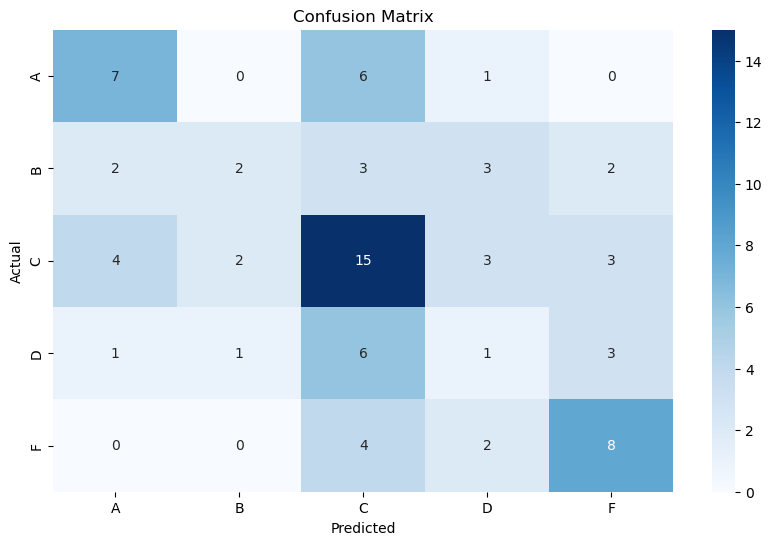


Top 10 Most Important Features:
absences     0.073128
Medu         0.053474
goout        0.052229
age          0.048951
freetime     0.046475
Walc         0.045814
Fedu         0.041846
health       0.040884
studytime    0.039201
famrel       0.037952
dtype: float64


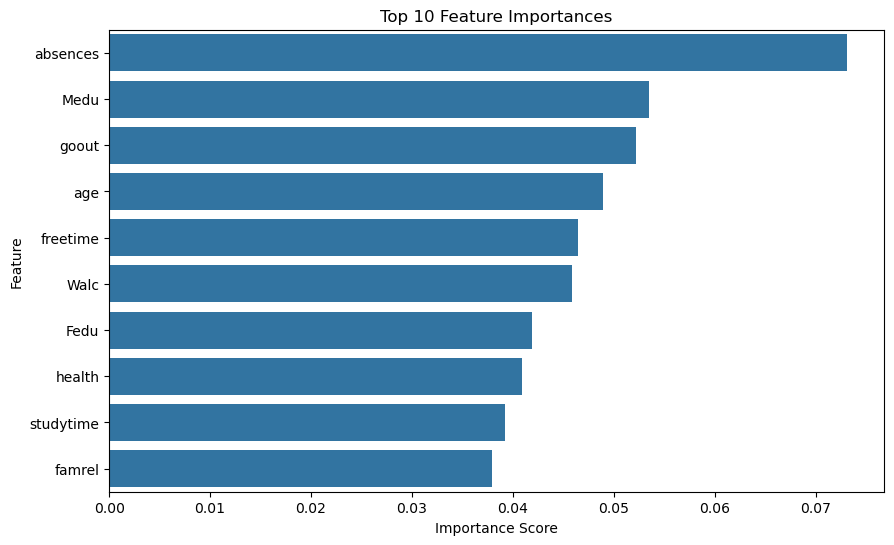

Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Cross-Validation Accuracy: 0.72 ± 0.15

Classification Report:
              precision    recall  f1-score   support

           A       0.50      0.50      0.50        14
           B       0.40      0.17      0.24        12
           C       0.44      0.56      0.49        27
           D       0.10      0.08      0.09        12
           F       0.50      0.57      0.53        14

    accuracy                           0.42        79
   macro avg       0.39      0.38      0.37        79
weighted avg       0.40      0.42      0.40        79



In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load and preprocess data
df = pd.read_csv('/Users/arianaelahi/Desktop/ML FINAL PROJECT DATA/student/student-mat.csv', sep=';')

# Drop G1 and G2 to avoid data leakage
df = df.drop(columns=['G1', 'G2'])

# Binary Encoding for yes/no and binary features
binary_columns = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
                  'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'F': 0, 'M': 1, 'U': 1, 'R': 0, 'LE3': 0, 'GT3': 1, 'T': 1, 'A': 0})

# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['school', 'Mjob', 'Fjob', 'reason', 'guardian'], drop_first=True)

# Convert G3 to letter grades
def convert_to_letter_grade(g):
    if g >= 15:
        return 'A'
    elif g >= 13:
        return 'B'
    elif g >= 10:
        return 'C'
    elif g >= 8:
        return 'D'
    else:
        return 'F'

y_letter = df['G3'].apply(convert_to_letter_grade)
X = df.drop(columns=['G3'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_letter, test_size=0.2, random_state=42, stratify=y_letter)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Define Random Forest Classifier and tune hyperparameters
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Best model
best_rf = grid_search.best_estimator_

# Predict
y_pred = best_rf.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C', 'D', 'F'], yticklabels=['A', 'B', 'C', 'D', 'F'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix.png')
plt.show()  # Display the plot
plt.close()

# Feature Importances
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_10_features = importances.sort_values(ascending=False).head(10)
print("\nTop 10 Most Important Features:")
print(top_10_features)

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.savefig('feature_importances.png')
plt.show()  # Display the plot
plt.close()


# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Cross-validation score
cv_scores = cross_val_score(best_rf, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: {:.2f} ± {:.2f}".format(cv_scores.mean(), cv_scores.std()))

# Predict and evaluate
y_pred = best_rf.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

UNSUPERVISED MODEL
*kmeans clustering*